In [ ]:
#Data Collection
import pandas_datareader as pdr

In [ ]:
df= pdr.get_data_tiingo('AAPL', api_key='88bfd7d4f12013b15bc75af5cda41e6f5d99fcc2')

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd 

In [ ]:
#reuploading data which has been saved
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-17 00:00:00+00:00,105.80,106.47,104.9600,105.52,34420705,24.597097,24.752863,24.401808,24.532000,137682820,0.0,1.0
1,AAPL,2016-03-18 00:00:00+00:00,105.92,106.50,105.1900,106.34,44205171,24.624995,24.759837,24.455280,24.722640,176820684,0.0,1.0
2,AAPL,2016-03-21 00:00:00+00:00,105.91,107.65,105.1401,105.93,35502678,24.622670,25.027197,24.443679,24.627320,142010712,0.0,1.0
3,AAPL,2016-03-22 00:00:00+00:00,106.72,107.29,105.2100,105.25,32444375,24.810984,24.943502,24.459930,24.469229,129777500,0.0,1.0
4,AAPL,2016-03-23 00:00:00+00:00,106.13,107.07,105.9000,106.48,25703495,24.673817,24.892355,24.620345,24.755188,102813980,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-03-09 00:00:00+00:00,121.085,122.06,118.79,119.03,129525780,121.085,122.06,118.79,119.03,129525780,0.0,1.0
1253,AAPL,2021-03-10 00:00:00+00:00,119.980,122.17,119.45,121.69,111943326,119.980,122.17,119.45,121.69,111943326,0.0,1.0
1254,AAPL,2021-03-11 00:00:00+00:00,121.960,123.21,121.26,122.54,103026514,121.960,123.21,121.26,122.54,103026514,0.0,1.0
1255,AAPL,2021-03-12 00:00:00+00:00,121.030,121.17,119.16,120.40,88105050,121.030,121.17,119.16,120.40,88105050,0.0,1.0
1256,AAPL,2021-03-15 00:00:00+00:00,123.990,124.00,120.42,121.41,92590555,123.990,124.00,120.42,121.41,92590555,0.0,1.0


In [ ]:
#so we have data till (2021-03-15) of apple stock price

In [ ]:
df1=df.reset_index()['close'] #we are taking close column and for this particular column we will do stock price prediction

In [ ]:
df1.shape

(1257,)

In [ ]:
df1

0       105.800
1       105.920
2       105.910
3       106.720
4       106.130
         ...   
1252    121.085
1253    119.980
1254    121.960
1255    121.030
1256    123.990
Name: close, Length: 1257, dtype: float64

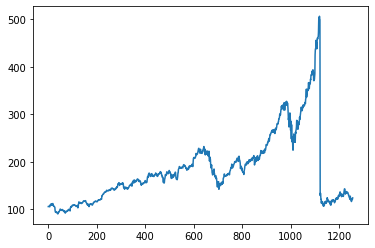

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
#LSTM are sensitive to scale of the data. So we apply MinMax Scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.03718581],
       [0.03747444],
       [0.03745039],
       ...,
       [0.07605532],
       [0.0738184 ],
       [0.08093806]])

In [ ]:
df1.shape

(1257, 1)

In [ ]:
#splitting data into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 8s 300ms/step - loss: 0.0140 - val_loss: 0.0543
Epoch 2/10
12/12 [==============================] - 2s 188ms/step - loss: 0.0025 - val_loss: 0.0274
Epoch 3/10
12/12 [==============================] - 2s 189ms/step - loss: 0.0010 - val_loss: 0.0218
Epoch 4/10
12/12 [==============================] - 2s 190ms/step - loss: 5.8859e-04 - val_loss: 0.0218
Epoch 5/10
12/12 [==============================] - 2s 196ms/step - loss: 5.9625e-04 - val_loss: 0.0210
Epoch 6/10
12/12 [==============================] - 2s 191ms/step - loss: 4.8969e-04 - val_loss: 0.0203
Epoch 7/10
12/12 [==============================] - 2s 192ms/step - loss: 4.4117e-04 - val_loss: 0.0198
Epoch 8/10
12/12 [==============================] - 2s 192ms/step - loss: 4.0955e-04 - val_loss: 0.0194
Epoch 9/10
12/12 [==============================] - 2s 194ms/step - loss: 4.3180e-04 - val_loss: 0.0190
Epoch 10/10
12/12 [==============================] - 2s 193ms/step - loss: 3

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.41109767039376

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

253.06579210851507

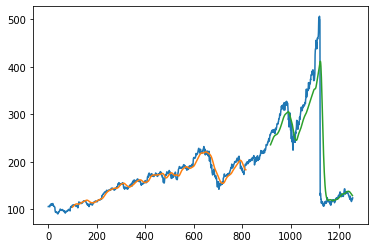

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:

len(test_data)

440

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input


[0.06381238725195432,
 0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.100132291040

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: ignored